In [50]:
from implementations import *
from data_cleanup import *
from functools import partial
np.warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
DATA_TRAIN_PATH = 'data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

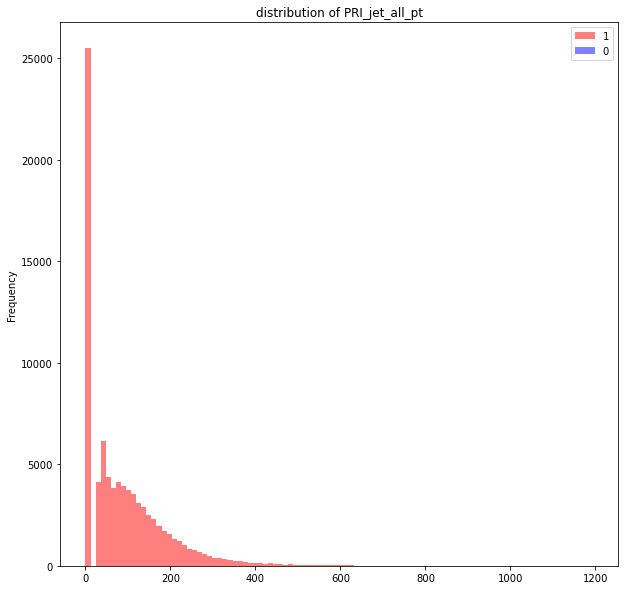

In [41]:
plot_feature_distribution(tX, y, 'PRI_jet_all_pt', 100)

Test data cleaning functions

In [57]:
tX = undefined_to_nans(tX)
tX = nan_features_to_zero(tX,threshold=0.8)
tX = nans_to_medians(tX)
tX = remove_zscore_outliers(tX)
tX = nan_features_to_zero(tX,threshold=0.8)
tX, y = remove_nans(tX, y)
y[y == -1] = 0
print(tX.shape, y.shape)

(209785, 30) (209785,)


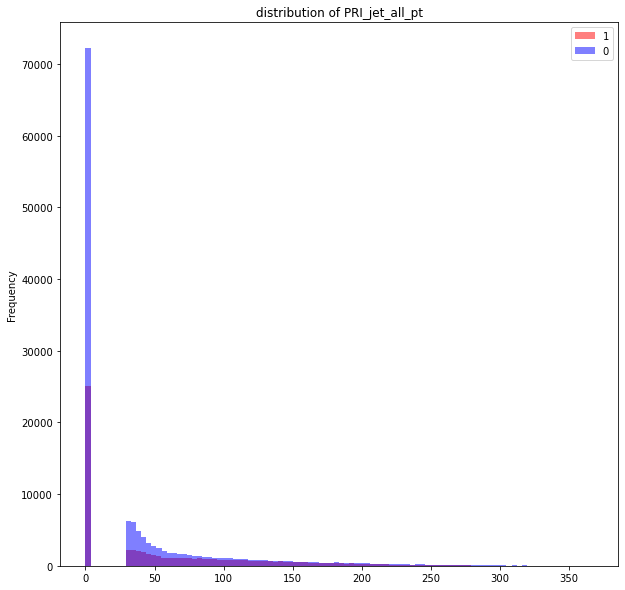

In [58]:
plot_feature_distribution(tX, y, 'PRI_jet_all_pt', 100)

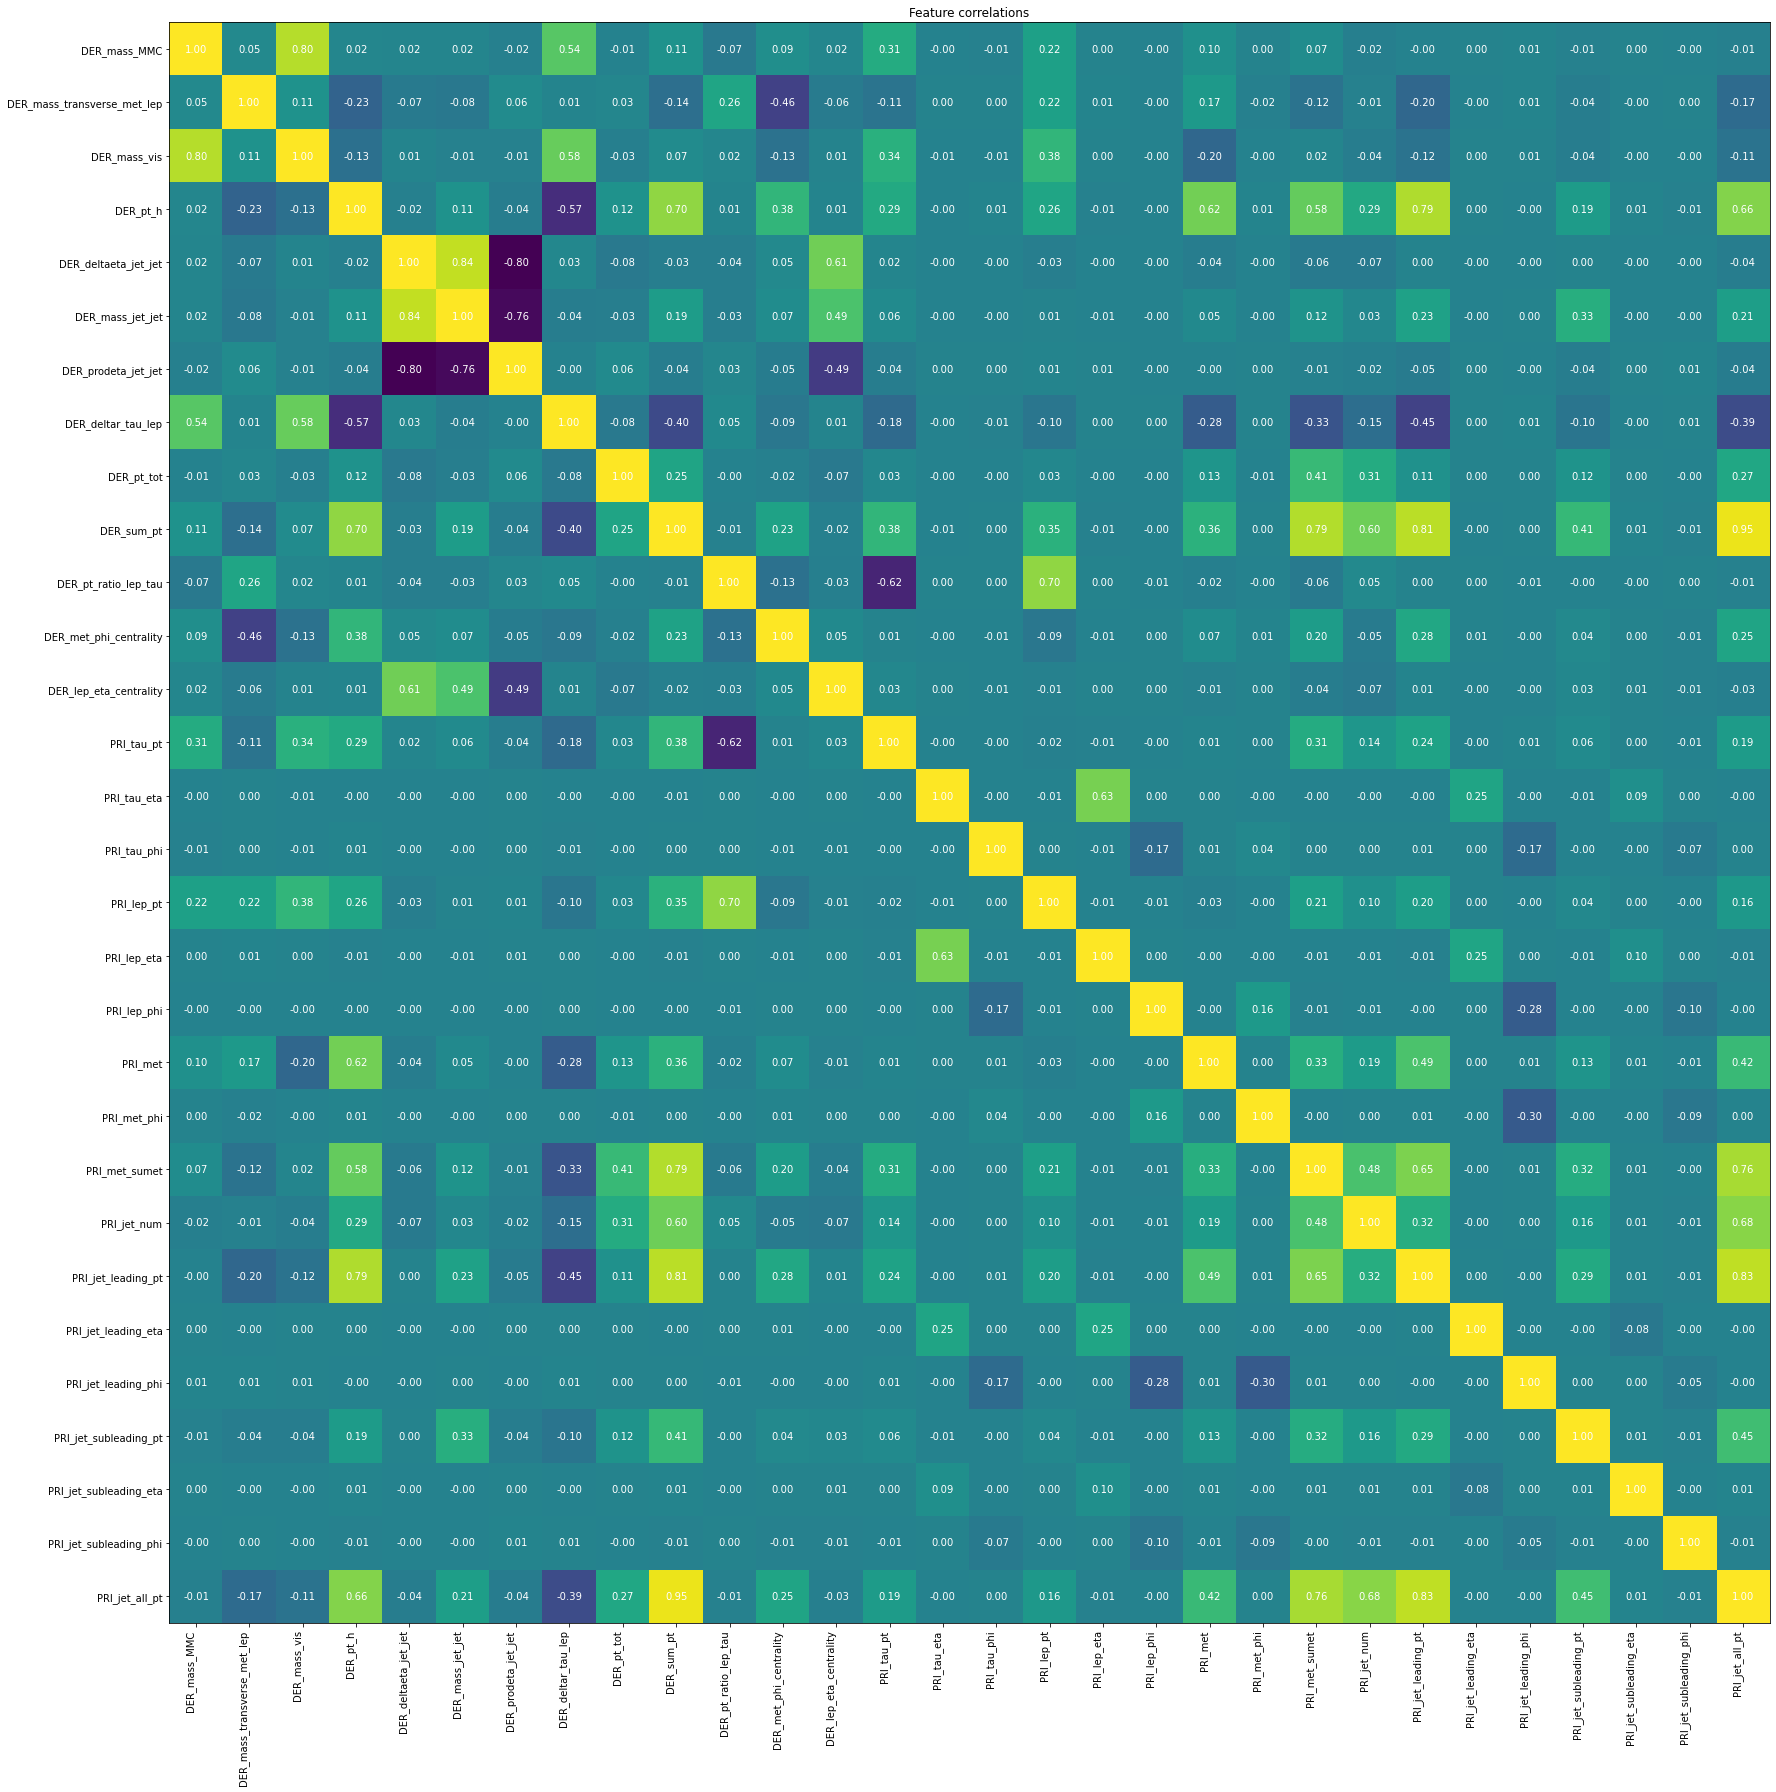

In [53]:
plot_correlation_heatmap(tX)

In [59]:
initial_w = np.zeros(30)
gamma = 0.02
max_iters = 10
batch_size = 20000
ratio = 0.8

Test logistic regression using Newton method

In [60]:
w , loss = logistic_regression_newton_method(y, tX, initial_w, max_iters,batch_size, ratio, gamma)

epoch: 0, train_loss: 66491.71739828508, test_loss: 17360.631558017478, test accuracy: 0.7562266129608886
epoch: 1, train_loss: 59501.012790348635, test_loss: 15665.33722065598, test accuracy: 0.7564649522129799
epoch: 2, train_loss: 54229.72111521843, test_loss: 14373.464445080754, test accuracy: 0.7565841218390257
epoch: 3, train_loss: 50155.01322055479, test_loss: 13364.841719208196, test accuracy: 0.7566556236146531
epoch: 4, train_loss: 46953.744923396276, test_loss: 12564.964214392563, test accuracy: 0.7567747932406989
epoch: 5, train_loss: 44394.43434164218, test_loss: 11927.01469801115, test accuracy: 0.7568939628667445
epoch: 6, train_loss: 42353.722584819225, test_loss: 11406.728640910706, test accuracy: 0.7570131324927902
epoch: 7, train_loss: 40679.06134010011, test_loss: 10989.778455303811, test accuracy: 0.7570608003432086
epoch: 8, train_loss: 39333.862538457644, test_loss: 10657.209614064122, test accuracy: 0.7566317896894439
epoch: 9, train_loss: 38260.78620608432, tes

In [4]:
dummy_x = np.random.rand(100,3)
dummy_y = np.random.randint(2, size=100)
dummy_w = np.random.rand(3)

Test cross validation

In [20]:
model = partial(logistic_regression_newton_method, initial_w = dummy_w, max_iters = 1, batch_size = 3, ratio = 1, gamma = gamma)
loss = compute_cross_entropy_loss
cross_validation_score(model, dummy_x , dummy_y, loss, cv=10, seed=1)


(array([56.3245671 , 60.61212019, 38.63844546,         nan, 47.65792721,
        53.18184157, 49.67965258, 56.22445997,         nan, 39.52370458]),
 array([10.1623112 ,  9.26797851,  5.82446841,         nan,  4.99288266,
         5.97836005,  4.09995075,  4.8679469 ,         nan,  3.79030706]))

In [21]:
cross_validation_score(least_squares, dummy_x , dummy_y, compute_mse, cv=10, seed=1)

(array([0.24902959, 0.24784201, 0.25177612, 0.26044077, 0.24703804,
        0.26202961, 0.25630501, 0.27068314, 0.25337535, 0.25488585]),
 array([0.16276925, 0.17203217, 0.1538825 , 0.11151261, 0.18063997,
        0.10554787, 0.13838861, 0.06695393, 0.1435896 , 0.14263828]))

testing least square and ridge

In [22]:
ridge_regression(dummy_y, dummy_x, 0.5)
least_squares(dummy_y, dummy_x)

(array([0.30557284, 0.39764686, 0.25265336]), 0.2563415255750497)

Create submission

In [23]:
OUTPUT_PATH = 'data/test.csv' 
_, tX_test, ids_test = load_csv_data(OUTPUT_PATH)
y_test = predict_logistic_labels(w, tX_test)
y_test = y_test * 2 - 1

create_csv_submission(ids_test, y_test, 'bkm.csv')


Logistic loss is working

In [10]:
w, loss = logistic_regression_gd(dummy_y, dummy_x, dummy_w, 1, 0.01)
print(w, loss)

[0.84473314 0.316918   0.16724724] 54.56900202610241


Visualization functions in action, we can plot distributions and scatterplots:

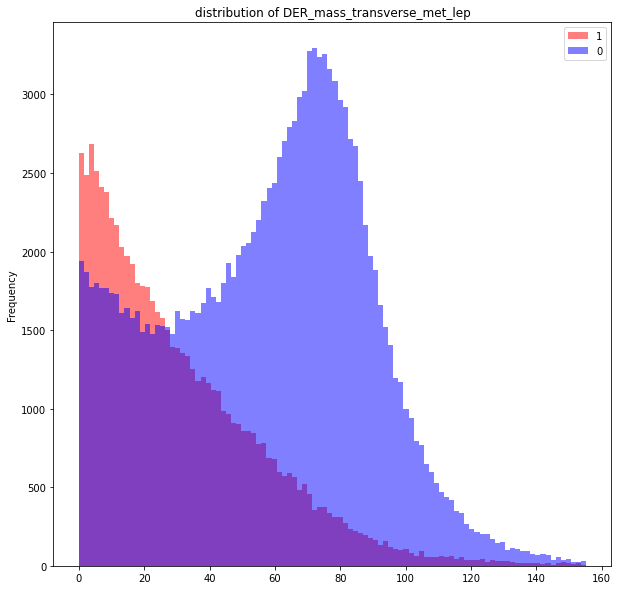

In [29]:
plot_feature_distribution(tX, y, 'DER_mass_transverse_met_lep', 100)

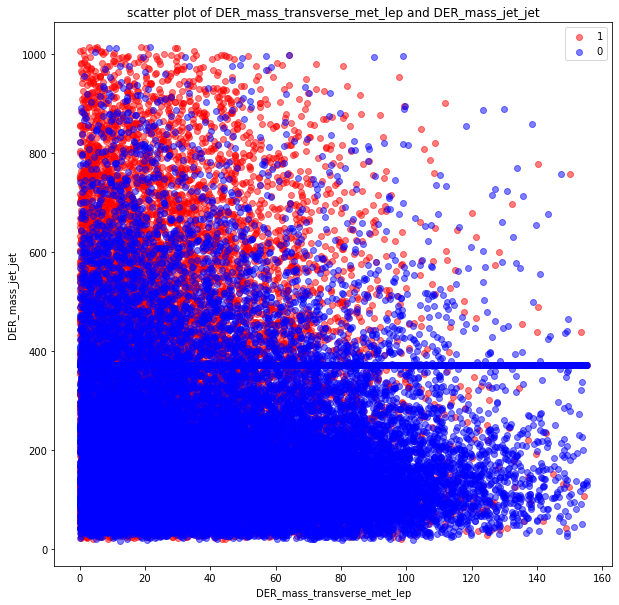

In [34]:
scatter_feature_distribution(tX, y, 'DER_mass_transverse_met_lep', 'DER_mass_jet_jet')

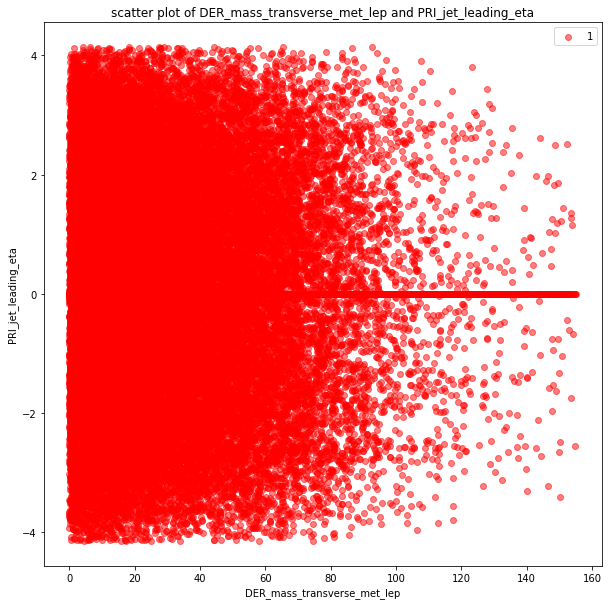

In [37]:
scatter_feature_distribution(tX, y, 'DER_mass_transverse_met_lep', 'PRI_jet_leading_eta', 1)